In [1]:
import requests 
from bs4 import BeautifulSoup as bs
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
iphone_reviews = []

In [3]:
for i in range (1,21):
    ip=[]
    url ="https://www.amazon.in/product-reviews/B08L5T44CQ/ref=acr_dp_hist_5?ie=UTF8&filterByStar=five_star&reviewerType=all_reviews#reviews-filter-bar="+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        ip.append(reviews[i].text)
    iphone_reviews = iphone_reviews+ip

In [4]:
with open("iphone.txt","w",encoding = 'utf-8') as output:
    output.write(str(iphone_reviews))

In [5]:
import os
os.getcwd()

'C:\\Users\\Priyanka'

In [6]:
red_rev_string = " ".join(iphone_reviews)

In [7]:
red_rev_string = re.sub("[^A-Za-z" "]+"," ",red_rev_string).lower()
red_rev_string =re.sub("[0-9" "]+"," ",red_rev_string)

In [8]:
red_rev_string

' excellent cell very good hello all first of all i would like to thank the seller for sending me a genuine product if you are trying to spend a good amount of money on buying this product and you see the first review on this page is really bad you become skeptical and think not twice but more than that to buy it from this seller but i received a genuine product regarding the phone i think i need not explain much here since there is enough youtube videos on detailed review but overall its good phone and worth the price only cons that i could see after using it for a weeks is that the batter will only last for a day with good screen time like watching videos and spending good time in social media but this is more than enough for average users since i was moving from android i had some issue in data chat sync but you can go through youtube for getting all workaround for your issues as usual great premium phone of prosthis time the apple iphone uses the right angled bezel of the iphone s 

In [9]:
red_rev_words = red_rev_string.split(" ")

In [10]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Priyanka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
red_rev_words = [w for w in red_rev_words if not w in stop_words]

In [12]:
red_rev_string =" ".join(red_rev_words)

In [13]:
wordcloud_ip = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(red_rev_string)

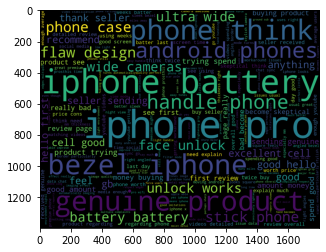

In [14]:
plt.imshow(wordcloud_ip)

In [15]:
with open("negative-words.txt","r") as neg:
  negwords = neg.read().split("\n")

In [16]:
negwords =negwords[37:]

In [17]:
red_pos = " ".join([w for w in red_rev_words if w in negwords])

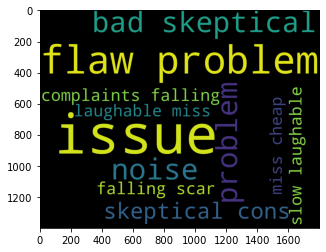

In [18]:
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(red_pos)

plt.imshow(wordcloud_pos)

In [19]:
red_unique = list(set(" ".join(iphone_reviews).split(" ")))

In [20]:
red_unique

['',
 'Several',
 'products.',
 'perfect',
 'feels',
 '\nRecently',
 'edges.',
 'feel',
 'that',
 'good!!\n',
 'right',
 'Don’t',
 'thick',
 'changed',
 'due',
 'display',
 'media',
 'other',
 'good!!!!!!!!The',
 '7',
 'it!!!\n',
 '.Since',
 'have',
 'also',
 'cameras',
 'Go',
 'are',
 'flaw',
 '😂.',
 'And',
 'fanboy',
 'time',
 'To',
 'pretty',
 'good\n',
 'i',
 'very',
 'say',
 'skin',
 'ur',
 'mine,',
 'GoyalDwarka',
 'still',
 'night',
 'particularly',
 'working',
 'trust',
 'mask',
 'problem.',
 'about',
 'amount',
 'IOS',
 '6',
 'since',
 'skeptical',
 '\nI',
 'little',
 'capacity',
 'battery!!!,',
 'higher',
 'received',
 ',',
 'many',
 'iPhones',
 'slow.',
 'invest',
 'weeks',
 'X,',
 'Moving',
 'years',
 'was',
 'hand',
 'drop',
 'all',
 'genuine',
 'through',
 'VerdictOverall,',
 'primus',
 'like',
 'excellent',
 'average',
 'much',
 'i7',
 'any',
 'performance',
 'sensor',
 'more',
 'Signal,',
 'thickness',
 'smaller',
 'note',
 'The',
 'care',
 'youtube',
 'rate',
 'Interes

## Emotion Mining

In [21]:
import pandas as pd
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [22]:
afinn.head(2)

,word,value
0,abandon,-2
1,abandoned,-2


In [23]:
from nltk import tokenize
red_unique = tokenize.sent_tokenize(" ".join(iphone_reviews))
red_unique[5:15]

['But you can go through youtube for getting all workaround for your issues .',
 'As usual great & premium phone of 2020 .ProsThis time the Apple iPhone 12 uses the right-angled bezel of the iPhone 4S, which looks square, and it feels good in the hand.',
 'It feels better than the sleek bezel of the iPhone X, especially the 7.4mm thickness with right angles.',
 'The border is particularly stylish.The camera is awesome!',
 'The night view mode turns on automatically, and the imaging effect is really good!',
 'Video stabilization is also good!!!!!!!',
 '!The filter mode is quite good.',
 'Many Android phones are still many miles away from these tones even though there are good imitations.',
 'Apple was able to improve its tones.Image quality is perfect and there is little or no noise even in a low-light environment .',
 '** Signal, nothing to say!']

In [24]:
sent_df = pd.DataFrame(red_unique, columns=['word'])
sent_df

,word
0,"\nexcellent cell\n \nVery good\n \nHello All ,..."
1,If you are trying to spend a good amount of mo...
2,But I received a genuine product .Regarding t...
3,"But overall , its good phone and worth the pri..."
4,But this is more than enough for average users...
...,...
306,Only issue is it does not have a higher refres...
307,Go for it!
308,!So far the the battery is just ok I really ex...
309,So far so good!


In [25]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [26]:
import spacy
spacy.load('en_core_web_sm')
from spacy.lang.en import English

In [27]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        word = nlp(text)
        for word in red_unique:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [28]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [29]:
calculate_sentiment(text = 'amazing')

4

In [30]:
sent_df['sentiment_value'] = sent_df['word'].apply(calculate_sentiment)

In [31]:
sent_df['word_count'] = sent_df['word'].str.split().apply(len)
sent_df['word_count'].head(10)

0    23
1    48
2    29
3    49
4    24
5    14
6    32
7    18
8     8
9    14
Name: word_count, dtype: int64

In [32]:
sent_df.sort_values(by='sentiment_value').tail(10)

,word,sentiment_value,word_count
124,"excellent cell\n \nVery good\n \nHello All ,Fi...",10,23
62,"excellent cell\n \nVery good\n \nHello All ,Fi...",10,23
186,"excellent cell\n \nVery good\n \nHello All ,Fi...",10,23
248,"excellent cell\n \nVery good\n \nHello All ,Fi...",10,23
0,"\nexcellent cell\n \nVery good\n \nHello All ,...",10,23
127,"But overall , its good phone and worth the pri...",13,49
65,"But overall , its good phone and worth the pri...",13,49
3,"But overall , its good phone and worth the pri...",13,49
251,"But overall , its good phone and worth the pri...",13,49
189,"But overall , its good phone and worth the pri...",13,49


In [33]:
sent_df['sentiment_value'].describe()

count    311.000000
mean       1.816720
std        2.764144
min       -3.000000
25%        0.000000
50%        1.000000
75%        3.000000
max       13.000000
Name: sentiment_value, dtype: float64

In [34]:
sent_df[sent_df['sentiment_value']<=0].head()

,word,sentiment_value,word_count
1,If you are trying to spend a good amount of mo...,-2,48
2,But I received a genuine product .Regarding t...,0,29
4,But this is more than enough for average users...,0,24
5,But you can go through youtube for getting all...,0,14
7,It feels better than the sleek bezel of the iP...,0,18


In [35]:
sent_df[sent_df['sentiment_value']>=10].head()

,word,sentiment_value,word_count
0,"\nexcellent cell\n \nVery good\n \nHello All ,...",10,23
3,"But overall , its good phone and worth the pri...",13,49
62,"excellent cell\n \nVery good\n \nHello All ,Fi...",10,23
65,"But overall , its good phone and worth the pri...",13,49
124,"excellent cell\n \nVery good\n \nHello All ,Fi...",10,23


In [36]:
sent_df['index']=range(0,len(sent_df))

C:\Users\Priyanka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

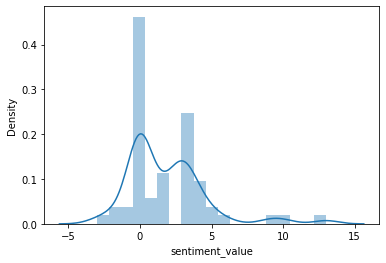

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

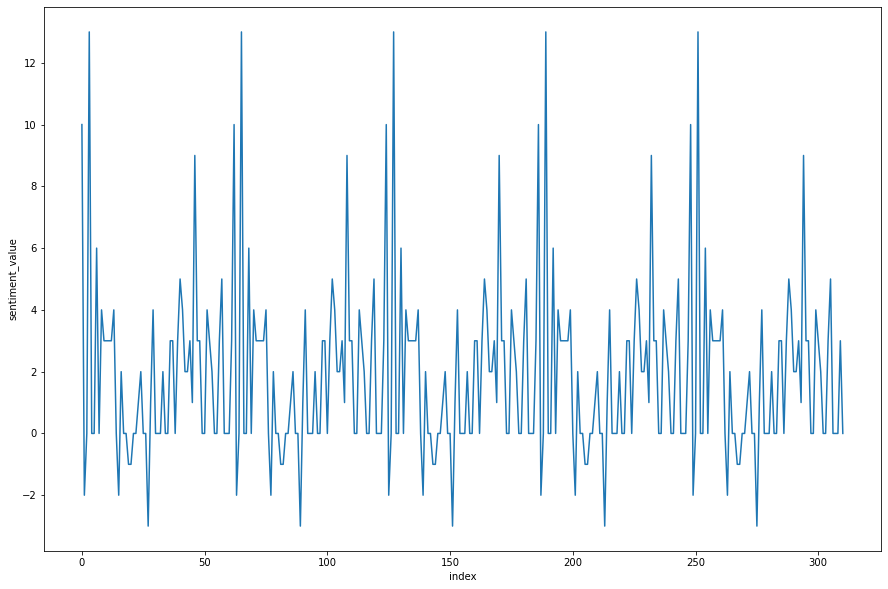

In [38]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

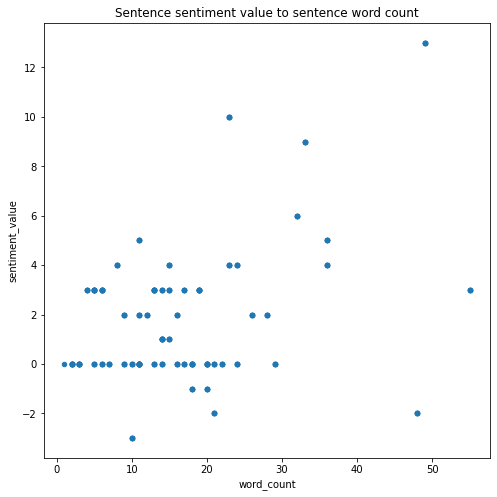

In [39]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')